# Bairagi et al. (2008) Model Code

# Table of Contents
1. [Instructions](#instructions)
    1. [Parameter Optimization Against TSST Data Sets](#TSSTInstructions)
    2. [Parameter Optimization Against Basal Data Sets](#basalInstructions)
    3. [Running Without Parameter Optimization](#noOptInstructions)
2. [Imports](#imports)
3. [Parameters and Initial Conditions](#params)
4. [Put Raw Data into Arrays](#rawdata)
    1. [Concentration Scales](#scales)
    2. [Plot Data Sets](#plotdata)
5. [Model Function--Includes ODE Solver](#modelfunction)
6. [Cost Function Definition](#cost)
7. [Run the Optimization](#run)
8. [Save Output to File](#saveoutput)
9. [Compute Means and Std Devations of Parameters and Output as Table](#paramtable)
10. [Plots](#plots)
11. [Reproduce Figure 2 from Paper](#no-opt)
12. [Load Data from File (and Export to Excel)](#excelexport)
13. [Dependencies](#dependencies)

## Instructions <a name="instructions"></a>

### Parameter Optimization Against TSST Data Sets <a name="TSSTInstructions" />

**Note:** To quickly run a cell (or a selection of cells), use the shortcut Shift+Enter (or you can also use the button labeled "Run" in the toolbar at the top).

To run simulations with parameter optimization against TSST data, there is no need to change any cells until the cost function cell. Simply run all cells up to the cell below the heading **Cost Function Definition**.

In order to set which data set to optimize parameters against, look for the following line of code in the cost function definition:
    
    return costFun.SSE_cost(...)

**Note:** You also have the option of using a cost function based on the maximum distance between simulation and real-world data. Simply change SSE_cost to MAX_cost, the instructions for function arguments remain the same.

In order to run against a patient from the TSST data sets, simply change the second and fourth arguments to reflect the patient number and subject group. The subject groups are:

- nelsonMelancholicACTH & nelsonMelancholicCortisol (15 patients)
- nelsonAtypicalACTH & nelsonAtypicalCortisol (14 patients)
- nelsonNeitherACTH & nelsonNeitherCortisol (14 patients)
- nelsonHealthyACTH & nelsonHealthyCortisol (15 patients)

You could also run against the mean of all patients cortisol and ACTH concentration values by using `nelsonACTH[:,1]` and `nelsonCortisol[:,1]`. Or you can run against the mean of any subgroup using `nelson<subgroup name>Cortisol_mean` and `nelson<subgroup name>ACTH_mean` without any indices (for instance `nelsonMelancholicCortisol_mean` & `nelsonMelancholicACTH_mean`).

The following are several examples of arguments you could pass the cost function with explanations:

- `nelsonACTH[:,0], nelsonMelancholicACTH[:,0], nelsonCortisol[:,0], nelsonMelancholicCortisol[:,0], simData`
    - The 1st patient in the Melancholic subgroup (Python array indexing starts at 0!)
- `nelsonACTH[:,0], nelsonAtypicalACTH[:,13], nelsonCortisol[:,0], nelsonAtypicalCortisol[:,13], simData`
    - The 14th patient in the Atypical subgroup
- `nelsonACTH[:,0], nelsonHealthyACTH[:,3], nelsonCortisol[:,0], nelsonHealthyCortisol[:,3], simData`
    - The 2nd patient in the Control group
- `nelsonACTH[:,0], nelsonACTH[:,1], nelsonCortisol[:,0], nelsonCortisol[:,1], simData`
    - The mean data set for all patients (depressed and control)
- `nelsonACTH[:,0], nelsonHealthyACTH_mean, nelsonCortisol[:,0], nelsonHealthyCortisol_mean, simData`
    - The mean of all control patients
    
In order to find out the actual Patient ID of the patient you are matching, try creating a new cell and entering the following command (using the group name and index number you used in the cost function arguments):

    print(melancholic_ids[0])
    
Next, you need to set the initial conditions for each ODE. In the cell directly below the heading **Run the Optimization**, you'll need to change the following line:

    y0 = [1, nelsonACTH[0,1], nelsonCortisol[0,1]]
    
Depending on which data set you used, change `nelsonACTH` and `nelsonCortisol` to match. Then, depending on which patient you used, change `[0,1]` in both places to `[0,#]` where # is replaced with the number from above. 

Alternatively, if you used the mean of all patients, you'd leave it unchanged.
    
And for each of the subgroup means, you'd use (or simply replace Healthy with whichever other subgroup you used):

    y0 = [1, nelsonHealthyACTH_mean[0], nelsonHealthyCortisol_mean[0]]
    
At this point, you are ready to run the optimization, so simply run the cells up to the heading **Save Output to File**. This may take some time, so while it is running you can move on to the next steps (if you run a cell while another is processing, it will add it to a queue).

The next few cells under the heading **Save Output to File** can be changed so that the filenames match the subgroup and patient you are running. For instance, the filename below is for the Melancholic subgroup patient with ID 3:

    df_t.to_excel(excel_writer = 'bairagiModel_output/bairagiModel-nelson-melancholic-patientID_3-timeSteps-5-
        iterations.xlsx')
    
The final step after saving the outputs is to plot the simulations against the real-world data. The cell under the heading **Plots** contains the code for this purpose. The lines of concern to ensure that you're showing the data set that you matched are (marked with comments in the actual code cell):
```
ax2.plot(nelsonACTH[:,0]*3, nelsonACTH[:,1], label = "Nelson ACTH Data - Patient Mean", color = "orange")
ax3.plot(nelsonCortisol[:,0]*3, nelsonCortisol[:,1], label = "Nelson Cortisol Data - Patient Mean", 
    color = "orange")
```
Here, change the first two arguments of each line to match exactly the arguments you used for the cost function. We multiply the time steps by 3 here, because along with multiplying by 20 from before, that gives us a time scale of seconds. The labels can be changed to the patient subgroup and Patient ID you matched, also. And the filename for the figure can be changed in the last line of the cell:

    plt.savefig("bairagiModel_output/bairagiModel-nelson-melancholic-patientID_3-5-iterations-all-params-
        normalizedCost.png", dpi = 300)
    
### Parameter Optimization Against Basal Data Sets <a name="basalInstructions" />

Since these data sets have data points over a 24-hour period (1440 minutes), rather than 140.01 minutes, you will need to change the time interval over which the ODE solver integrates. Strangely, this model seems to be off by a factor of 20 in the time scale, so 140 minutes becomes 2800 time steps--and 1455 minutes becomes 29100 time steps. The reason you add the extra 15 minutes is that you need to make sure that when you interpolate between your simulated data points the line covers every real-world data point so that you don't cause issues when computing the cost function (and the last data point for the Golier cortisol concentration data sets is at 1455 minutes).

To change the time scale, go to the cell directly above the heading **Put Raw Data Into Arrays** and uncomment (delete the # at the start of the line) the lines:

    t_start = -0.5
    t_end = 29100.5
    t_step = 0.5

You'll need to comment out the other definitons for these variables (place a # at the start of the line).

After making this change, you need to again change the cost function arguments so that you are matching the basal data set in which you are interested. This time, however, you will also need to change the first and third arguments, because we need to tell the function the correct time steps for the data set.

First, choose which data set you wish to match. Here are the options:

- yehudaControlCortisol
- yehudaPTSDCortisol
- yehudaDepressedCortisol
- carrollControlCortisol & carrollControlACTH
- carrollLCDepressedCortisol & carrollLCDepressedACTH (LC = Low Cortisol)
- carrollHCDepressedCortisol & carrollHCDepressedACTH (HC = High Cortisol)
- golierPTSDCortisol & golierPTSDACTH
- golierNonPTSDTraumaExposedCortisol & golierNonPTSDTraumaExposedACTH
- golierNonPTSDNonExposedCortisol & golierNonPTSDNonExposedACTH
- bremnerAbusedPTSDCortisol
- bremnerNonAbusedPTSDCortisol
- bremnerNonAbusedNonPTSDCortisol

**Note:** To see what any of these data sets looks like, click on the **Plot Basal Data Sets** heading in the Table of Contents.

**Note Also:** These data sets all come in smoothed versions (each data point is set to the average of the nearest 5 points of the unsmoothed data). Also, the data sets by Carroll, Golier and Bremner also come in rearranged (or smoothed & rearranged) versions to match the starting time of the Yehuda data (10AM). To use any of these versions, simply append one of the following tags to the end of the data set name (before the indices): `_smooth`, `_rearr`, or `_rearr_smooth`.

First, I will cover what to do with data sets that contain both ACTH and cortisol values, and then afterwards I will cover using the Yehuda and Bremner data sets (which have only cortisol concentration data). For all of these data sets, the first column is the time step values. This means that if you take any of these arrays and index it with `[:,0]`, you are referring to the time steps. These are the values we need to pass as the first (ACTH time steps) and third (cortisol time steps) arguments to the cost function.

Then for the second and fourth arguments, you index the same data sets with `[:,1]` to mean the second column (which contains the mean concentration values for each patient group).

Here are a couple of examples showing arguments you can pass to the cost function:

- `carrollControlACTH_smooth[:,0], carrollControlACTH_smooth[:,1], carrollControlCortisol_smooth[:,0], carrollControlCortisol_smooth[:,1], simData`
    - The smoothed Control group mean for the Carroll data set
- `golierNonPTSDTraumaExposedACTH[:,0], golierNonPTSDTraumaExposedACTH[:,1], golierNonPTSDTraumaExposedCortisol[:,0], golierNonPTSDTraumaExposedCortisol[:,1], simData`
    - The Trauma-Exposed Control group mean for the Golier data set
    
In order to run simulations against data sets that do not include ACTH concentration data, you will need to change the name of the function to `costFun.SSE_cost_noACTH` and then simply do not include the two arguments for ACTH data. To use the Yehuda Control group data, this would look like:

    return costFun.SSE_cost_noACTH(yehudaControlCortisol[:,0], yehudaControlCortisol[:,1], simData)

You'll also need to change the initial conditions in the cell below the heading **Run the Optimization**, again. Use the name of the data set you used for the cost function, and change the indices to `[0,1]` for both. Here's an example (using the smoothed Carroll Control group data set):

    y0 = [1, carrollControlACTH_smooth[0,1], carrollControlCortisol_smooth[0,1]]
    
Next, because you changed the length of the interval over which the ODE solver integrates, you'll need to change the arrays initialized in the next cell to be longer. For each of the last 4 lines in the cell, you'll need to replace the number 5602 with 57602 (since we start at -0.5 and go until 28800.5 with a step size of 0.5, that's 57602 steps total).

At this point, you're ready to run the parameter optimization, so run the next cell. Again, it may take a while, so you can start editing the remaining cells while you wait.

The cells under the heading **Save Output to File** should each have the filename changed to something that reflects the data set you're matching now. For instance, the Excel filename for sims_acth when matching the smoothed Carroll Control group would become:

    df_crh.to_excel(excel_writer = 'bairagiModel_output/bairagiModel-carroll-control-smooth-sims-crh-5-
        iterations.xlsx')
            
Finally, the cell under the heading **Plots** needs to have the same lines changed as described above. For instance, when matching the smoothed Carroll Control group, they would become:
```
ax2.plot(carrollControlACTH_smooth[:,0]*3, carrollControlACTH_smooth[:,1], label = "Carroll Control ACTH Data", 
    color = "orange")
ax3.plot(carrollControlCortisol_smooth[:,0]*3, carrollControlCortisol_smooth[:,1], label = "Carroll Control 
    Cortisol Data", color = "orange")
```
The data set names and indices here should match exactly the names and indices used as arguments to the cost function. Also, the last line of the cell can have the filename changed as described above to reflect which data set you are plotting.

### Running Without Parameter Optimization <a name="noOptInstructions" />

To reproduce Figure 2 from the Bairagi et al. (2008) paper, you don't need to edit any code. Simply run the cells in the section labeled **Reproducing Figure 2 from Paper**.

To run the model with any set of paramaters you desire, without optimization, you can use the same cells.

Set the parameters, initial conditions and time interval you want to use by changing the values defined in the section **Parameters and Initial Conditions**. You can then run the cells under the heading **No Optimization Run and Plot**, except for the first cell that defines the time interval and initial conditions.

## Imports <a name="imports"></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco
from scipy import optimize
from scipy.interpolate import interp1d
import mpld3
from tabulate import tabulate
import pandas as pd
from HPAmodeling import ODEsolver
from HPAmodeling import costFun
from HPAmodeling import dataImport

# Parameters and Initial Conditions <a name="params"></a>

In [2]:
# initial conditions
# order: CRH, ACTH, CORT

# based on: golierPTSD
y0 = [10, 44.22111, 10.68792]

In [3]:
# authors' listed parameter values
b1 = 0.023
b2 = 0.04
b3 = 0.0083
g1 = 0.032
g2 = 0.0013
V = 3
K = 0.048
m = 3
a1 = 0.015
a2 = 0.026

# save these parameter values in an array to use when running without optimization
authors_params = [b1, b2, b3, g1, g2, V, K, m, a1, a2]

In [4]:
# time delay parameters, as used in Figure 2 from the paper
tau1 = 30
tau2 = 60
tau_prime = 10

In [5]:
# compute bounds based on +- 10%
bound = a2
print(bound - bound*.1)
print(bound + bound*.1)

0.023399999999999997
0.0286


In [6]:
# bounds for parameter optimization
# starting with +- 10% since we do not have published ranges in the paper
# order is: b1, b2, b3, g1, g2, V, K, m, a1, a2
bounds = [(0.0207, 0.0253), (0.036000000000000004, 0.044), (0.00747, 0.00913), (0.0288, 0.0352), (0.00117, 0.0014299999999999998), (2.7, 3.3), (0.0432, 0.0528), (2.7, 3.3), (0.0135, 0.0165), (0.023399999999999997, 0.0286)]

In [8]:
# define time interval for integration

# time interval and step definition
# all data sets end on 1440.0 or earlier except the Golier cortisol sets,
# they end on 1455.0, so I should set t_end = 1455.01 when matching them
#
# strangely, the model seems to be off by a multiple of 20 in terms of the time step
# in order to match the data for 100 minutes from the authors in Figure 2, I had to run the code for 2000 minutes
#t_start = -0.5
#t_end = 28800.5
#t_step = 0.5

# for matching Nelson data, use these values of t_start, t_end and t_step
#
# the factor of 20 here makes the last time step 2800 for the Nelson data
t_start = -0.5
t_end = 2800.5
t_step = 0.5

## Put Raw Data into Arrays <a name="rawdata"></a>

In [8]:
(yehudaControlCortisol, 
 yehudaControlCortisol_smooth, 
 yehudaPTSDCortisol, 
 yehudaPTSDCortisol_smooth, 
 yehudaDepressedCortisol, 
 yehudaDepressedCortisol_smooth) = dataImport.yehuda()

In [9]:
(carrollControlCortisol, 
 carrollControlCortisol_rearr, 
 carrollControlCortisol_smooth, 
 carrollControlCortisol_rearr_smooth, 
 carrollControlACTH, 
 carrollControlACTH_rearr, 
 carrollControlACTH_smooth, 
 carrollControlACTH_rearr_smooth, 
 carrollHCDepressedCortisol, 
 carrollHCDepressedCortisol_rearr, 
 carrollHCDepressedCortisol_smooth, 
 carrollHCDepressedCortisol_rearr_smooth, 
 carrollHCDepressedACTH, 
 carrollHCDepressedACTH_rearr, 
 carrollHCDepressedACTH_smooth, 
 carrollHCDepressedACTH_rearr_smooth, 
 carrollLCDepressedCortisol, 
 carrollLCDepressedCortisol_rearr, 
 carrollLCDepressedCortisol_smooth, 
 carrollLCDepressedCortisol_rearr_smooth, 
 carrollLCDepressedACTH, 
 carrollLCDepressedACTH_rearr, 
 carrollLCDepressedACTH_smooth, 
 carrollLCDepressedACTH_rearr_smooth) = dataImport.carroll()

In [10]:
(golierPTSDCortisol, 
 golierPTSDCortisol_rearr, 
 golierPTSDCortisol_smooth, 
 golierPTSDCortisol_rearr_smooth, 
 golierPTSDACTH, 
 golierPTSDACTH_rearr, 
 golierPTSDACTH_smooth, 
 golierPTSDACTH_rearr_smooth, 
 golierNonPTSDTraumaExposedCortisol, 
 golierNonPTSDTraumaExposedCortisol_rearr, 
 golierNonPTSDTraumaExposedCortisol_smooth, 
 golierNonPTSDTraumaExposedCortisol_rearr_smooth, 
 golierNonPTSDTraumaExposedACTH, 
 golierNonPTSDTraumaExposedACTH_rearr, 
 golierNonPTSDTraumaExposedACTH_smooth, 
 golierNonPTSDTraumaExposedACTH_rearr_smooth, 
 golierNonPTSDNonExposedCortisol, 
 golierNonPTSDNonExposedCortisol_rearr, 
 golierNonPTSDNonExposedCortisol_smooth, 
 golierNonPTSDNonExposedCortisol_rearr_smooth, 
 golierNonPTSDNonExposedACTH, 
 golierNonPTSDNonExposedACTH_rearr, 
 golierNonPTSDNonExposedACTH_smooth, 
 golierNonPTSDNonExposedACTH_rearr_smooth) = dataImport.golier()

In [11]:
(bremnerAbusedPTSDCortisol, 
 bremnerAbusedPTSDCortisol_rearr, 
 bremnerAbusedPTSDCortisol_smooth, 
 bremnerAbusedPTSDCortisol_rearr_smooth, 
 bremnerNonAbusedPTSDCortisol, 
 bremnerNonAbusedPTSDCortisol_rearr, 
 bremnerNonAbusedPTSDCortisol_smooth, 
 bremnerNonAbusedPTSDCortisol_rearr_smooth, 
 bremnerNonAbusedNonPTSDCortisol, 
 bremnerNonAbusedNonPTSDCortisol_rearr, 
 bremnerNonAbusedNonPTSDCortisol_smooth, 
 bremnerNonAbusedNonPTSDCortisol_rearr_smooth) = dataImport.bremner()

In [12]:
(nelsonCortisol, 
 nelsonACTH, 
 nelsonAtypicalCortisol, 
 nelsonAtypicalACTH, 
 nelsonMelancholicCortisol, 
 nelsonMelancholicACTH, 
 nelsonNeitherCortisol, 
 nelsonNeitherACTH, 
 nelsonHealthyCortisol, 
 nelsonHealthyACTH, 
 atypical_ids, 
 melancholic_ids, 
 neither_ids, 
 healthy_ids) = dataImport.nelson()

### Change Time and Concentration Scales <a name="scales"></a>

In [13]:
# convert the time scale of the Golier data sets to minutes (from hours)
for i in range(len(golierPTSDCortisol)):
    golierPTSDCortisol[i,0] = golierPTSDCortisol[i,0]*60
    golierNonPTSDTraumaExposedCortisol[i,0] = golierNonPTSDTraumaExposedCortisol[i,0]*60
    golierNonPTSDNonExposedCortisol[i,0] = golierNonPTSDNonExposedCortisol[i,0]*60
    golierPTSDCortisol_rearr[i,0] = golierPTSDCortisol_rearr[i,0]*60
    golierNonPTSDTraumaExposedCortisol_rearr[i,0] = golierNonPTSDTraumaExposedCortisol_rearr[i,0]*60
    golierNonPTSDNonExposedCortisol_rearr[i,0] = golierNonPTSDNonExposedCortisol_rearr[i,0]*60
    golierPTSDCortisol_smooth[i,0] = golierPTSDCortisol_smooth[i,0]*60
    golierNonPTSDTraumaExposedCortisol_smooth[i,0] = golierNonPTSDTraumaExposedCortisol_smooth[i,0]*60
    golierNonPTSDNonExposedCortisol_smooth[i,0] = golierNonPTSDNonExposedCortisol_smooth[i,0]*60
    golierPTSDCortisol_rearr_smooth[i,0] = golierPTSDCortisol_rearr_smooth[i,0]*60
    golierNonPTSDTraumaExposedCortisol_rearr_smooth[i,0] = golierNonPTSDTraumaExposedCortisol_rearr_smooth[i,0]*60
    golierNonPTSDNonExposedCortisol_rearr_smooth[i,0] = golierNonPTSDNonExposedCortisol_rearr_smooth[i,0]*60
    
for i in range(len(golierPTSDACTH)):
    golierPTSDACTH[i,0] = golierPTSDACTH[i,0]*60
    golierNonPTSDTraumaExposedACTH[i,0] = golierNonPTSDTraumaExposedACTH[i,0]*60
    golierNonPTSDNonExposedACTH[i,0] = golierNonPTSDNonExposedACTH[i,0]*60
    golierPTSDACTH_rearr[i,0] = golierPTSDACTH_rearr[i,0]*60
    golierNonPTSDTraumaExposedACTH_rearr[i,0] = golierNonPTSDTraumaExposedACTH_rearr[i,0]*60
    golierNonPTSDNonExposedACTH_rearr[i,0] = golierNonPTSDNonExposedACTH_rearr[i,0]*60
    golierPTSDACTH_smooth[i,0] = golierPTSDACTH_smooth[i,0]*60
    golierNonPTSDTraumaExposedACTH_smooth[i,0] = golierNonPTSDTraumaExposedACTH_smooth[i,0]*60
    golierNonPTSDNonExposedACTH_smooth[i,0] = golierNonPTSDNonExposedACTH_smooth[i,0]*60
    golierPTSDACTH_rearr_smooth[i,0] = golierPTSDACTH_rearr_smooth[i,0]*60
    golierNonPTSDTraumaExposedACTH_rearr_smooth[i,0] = golierNonPTSDTraumaExposedACTH_rearr_smooth[i,0]*60
    golierNonPTSDNonExposedACTH_rearr_smooth[i,0] = golierNonPTSDNonExposedACTH_rearr_smooth[i,0]*60

In [14]:
# convert the time scale of the Bremner data sets to minutes (from hours)
for i in range(len(bremnerAbusedPTSDCortisol)):
    bremnerAbusedPTSDCortisol[i,0] = bremnerAbusedPTSDCortisol[i,0]*60
    bremnerNonAbusedPTSDCortisol[i,0] = bremnerNonAbusedPTSDCortisol[i,0]*60
    bremnerNonAbusedNonPTSDCortisol[i,0] = bremnerNonAbusedNonPTSDCortisol[i,0]*60
    bremnerAbusedPTSDCortisol_rearr[i,0] = bremnerAbusedPTSDCortisol_rearr[i,0]*60
    bremnerNonAbusedPTSDCortisol_rearr[i,0] = bremnerNonAbusedPTSDCortisol_rearr[i,0]*60
    bremnerNonAbusedNonPTSDCortisol_rearr[i,0] = bremnerNonAbusedNonPTSDCortisol_rearr[i,0]*60
    bremnerAbusedPTSDCortisol_smooth[i,0] = bremnerAbusedPTSDCortisol_smooth[i,0]*60
    bremnerNonAbusedPTSDCortisol_smooth[i,0] = bremnerNonAbusedPTSDCortisol_smooth[i,0]*60
    bremnerNonAbusedNonPTSDCortisol_smooth[i,0] = bremnerNonAbusedNonPTSDCortisol_smooth[i,0]*60
    bremnerAbusedPTSDCortisol_rearr_smooth[i,0] = bremnerAbusedPTSDCortisol_rearr_smooth[i,0]*60
    bremnerNonAbusedPTSDCortisol_rearr_smooth[i,0] = bremnerNonAbusedPTSDCortisol_rearr_smooth[i,0]*60
    bremnerNonAbusedNonPTSDCortisol_rearr_smooth[i,0] = bremnerNonAbusedNonPTSDCortisol_rearr_smooth[i,0]*60

### Concentration Scales
This model actually computes CRH, ACTH and Cortisol in pmol/L, rather than having the usual units of micrograms/dL and picograms/mL.

Therefore, we need to convert the scale of the data sets.

### For conversion of data to moles:

ACTH = 2933.444 g/mol

Cortisol = 362.46 g/mol

### Then we need to make the following conversions:
x pg/mL ACTH = x/2933.444e9 mol/L ACTH = x/2.933444e12 mol/L ACTH = x/2.933444 pmol/L ACTH

x micrograms/dL Cortisol = x/362.46e5 mol/L Cortisol = x/3.6246e7 mol/L Cortisol = x/3.6246e-5 pmol/L Cortisol

However, based on the graphs in the paper, I think the authors meant to use micromolar for the cortisol concentrations, because they report ~0.5-1 and this data is 35-40k if we use picomolar. So here I'm using x/3.6246e1 to get micromolar for the cortisol.

In [15]:
# convert all of the data sets to the proper scale following the 
#  procedure outlined above

for i in range(len(carrollControlACTH[:,1])):
    carrollControlACTH[i,1] = carrollControlACTH[i,1]/2.933444
    carrollControlACTH_rearr[i,1] = carrollControlACTH_rearr[i,1]/2.933444
    carrollControlACTH_smooth[i,1] = carrollControlACTH_smooth[i,1]/2.933444
    carrollControlACTH_rearr_smooth[i,1] = carrollControlACTH_rearr_smooth[i,1]/2.933444
    
for i in range(len(carrollControlCortisol[:,1])):
    carrollControlCortisol[i,1] = carrollControlCortisol[i,1]/3.6246e1
    carrollControlCortisol_rearr[i,1] = carrollControlCortisol_rearr[i,1]/3.6246e1
    carrollControlCortisol_smooth[i,1] = carrollControlCortisol_smooth[i,1]/3.6246e1
    carrollControlCortisol_rearr_smooth[i,1] = carrollControlCortisol_rearr_smooth[i,1]/3.6246e1
    
for i in range(len(carrollHCDepressedACTH[:,1])):
    carrollHCDepressedACTH[i,1] = carrollHCDepressedACTH[i,1]/2.933444
    carrollHCDepressedACTH_rearr[i,1] = carrollHCDepressedACTH_rearr[i,1]/2.933444
    carrollHCDepressedACTH_smooth[i,1] = carrollHCDepressedACTH_smooth[i,1]/2.933444
    carrollHCDepressedACTH_rearr_smooth[i,1] = carrollHCDepressedACTH_rearr_smooth[i,1]/2.933444

for i in range(len(carrollHCDepressedCortisol[:,1])):
    carrollHCDepressedCortisol[i,1] = carrollHCDepressedCortisol[i,1]/3.6246e1
    carrollHCDepressedCortisol_rearr[i,1] = carrollHCDepressedCortisol_rearr[i,1]/3.6246e1
    carrollHCDepressedCortisol_smooth[i,1] = carrollHCDepressedCortisol_smooth[i,1]/3.6246e1
    carrollHCDepressedCortisol_rearr_smooth[i,1] = carrollHCDepressedCortisol_rearr_smooth[i,1]/3.6246e1
    
for i in range(len(carrollLCDepressedACTH[:,1])):
    carrollLCDepressedACTH[i,1] = carrollLCDepressedACTH[i,1]/2.933444
    carrollLCDepressedACTH_rearr[i,1] = carrollLCDepressedACTH_rearr[i,1]/2.933444
    carrollLCDepressedACTH_smooth[i,1] = carrollLCDepressedACTH_smooth[i,1]/2.933444
    carrollLCDepressedACTH_rearr_smooth[i,1] = carrollLCDepressedACTH_rearr_smooth[i,1]/2.933444
    
for i in range(len(carrollLCDepressedCortisol[:,1])):
    carrollLCDepressedCortisol[i,1] = carrollLCDepressedCortisol[i,1]/3.6246e1
    carrollLCDepressedCortisol_rearr[i,1] = carrollLCDepressedCortisol_rearr[i,1]/3.6246e1
    carrollLCDepressedCortisol_smooth[i,1] = carrollLCDepressedCortisol_smooth[i,1]/3.6246e1
    carrollLCDepressedCortisol_rearr_smooth[i,1] = carrollLCDepressedCortisol_rearr_smooth[i,1]/3.6246e1
    
for i in range(len(yehudaControlCortisol[:,1])):
    yehudaControlCortisol[i,1] = yehudaControlCortisol[i,1]/3.6246e1
    yehudaControlCortisol_smooth[i,1] = yehudaControlCortisol_smooth[i,1]/3.6246e1
    
for i in range(len(yehudaPTSDCortisol[:,1])):
    yehudaPTSDCortisol[i,1] = yehudaPTSDCortisol[i,1]/3.6246e1
    yehudaPTSDCortisol_smooth[i,1] = yehudaPTSDCortisol_smooth[i,1]/3.6246e1
    
for i in range(len(yehudaDepressedCortisol[:,1])):
    yehudaDepressedCortisol[i,1] = yehudaDepressedCortisol[i,1]/3.6246e1
    yehudaDepressedCortisol_smooth[i,1] = yehudaDepressedCortisol_smooth[i,1]/3.6246e1
    
for i in range(len(golierPTSDCortisol[:,1])):
    golierPTSDCortisol[i,1] = golierPTSDCortisol[i,1]/3.6246e1
    golierPTSDCortisol_rearr[i,1] = golierPTSDCortisol_rearr[i,1]/3.6246e1
    golierPTSDCortisol_smooth[i,1] = golierPTSDCortisol_smooth[i,1]/3.6246e1
    golierPTSDCortisol_rearr_smooth[i,1] = golierPTSDCortisol_rearr_smooth[i,1]/3.6246e1
    
for i in range(len(golierPTSDACTH[:,1])):
    golierPTSDACTH[i,1] = golierPTSDACTH[i,1]/2.933444
    golierPTSDACTH_rearr[i,1] = golierPTSDACTH_rearr[i,1]/2.933444
    golierPTSDACTH_smooth[i,1] = golierPTSDACTH_smooth[i,1]/2.933444
    golierPTSDACTH_rearr_smooth[i,1] = golierPTSDACTH_rearr_smooth[i,1]/2.933444

for i in range(len(golierNonPTSDTraumaExposedCortisol[:,1])):
    golierNonPTSDTraumaExposedCortisol[i,1] = golierNonPTSDTraumaExposedCortisol[i,1]/3.6246e1
    golierNonPTSDTraumaExposedCortisol_rearr[i,1] = golierNonPTSDTraumaExposedCortisol_rearr[i,1]/3.6246e1
    golierNonPTSDTraumaExposedCortisol_smooth[i,1] = golierNonPTSDTraumaExposedCortisol_smooth[i,1]/3.6246e1
    golierNonPTSDTraumaExposedCortisol_rearr_smooth[i,1] = golierNonPTSDTraumaExposedCortisol_rearr_smooth[i,1]/3.6246e1
    
for i in range(len(golierNonPTSDTraumaExposedACTH[:,1])):
    golierNonPTSDTraumaExposedACTH[i,1] = golierNonPTSDTraumaExposedACTH[i,1]/2.933444
    golierNonPTSDTraumaExposedACTH_rearr[i,1] = golierNonPTSDTraumaExposedACTH_rearr[i,1]/2.933444
    golierNonPTSDTraumaExposedACTH_smooth[i,1] = golierNonPTSDTraumaExposedACTH_smooth[i,1]/2.933444
    golierNonPTSDTraumaExposedACTH_rearr_smooth[i,1] = golierNonPTSDTraumaExposedACTH_rearr_smooth[i,1]/2.933444
    
for i in range(len(golierNonPTSDNonExposedCortisol[:,1])):
    golierNonPTSDNonExposedCortisol[i,1] = golierNonPTSDNonExposedCortisol[i,1]/3.6246e1
    golierNonPTSDNonExposedCortisol_rearr[i,1] = golierNonPTSDNonExposedCortisol_rearr[i,1]/3.6246e1
    golierNonPTSDNonExposedCortisol_smooth[i,1] = golierNonPTSDNonExposedCortisol_smooth[i,1]/3.6246e1
    golierNonPTSDNonExposedCortisol_rearr_smooth[i,1] = golierNonPTSDNonExposedCortisol_rearr_smooth[i,1]/3.6246e1
    
for i in range(len(golierNonPTSDNonExposedACTH[:,1])):
    golierNonPTSDNonExposedACTH[i,1] = golierNonPTSDNonExposedACTH[i,1]/2.933444
    golierNonPTSDNonExposedACTH_rearr[i,1] = golierNonPTSDNonExposedACTH_rearr[i,1]/2.933444
    golierNonPTSDNonExposedACTH_smooth[i,1] = golierNonPTSDNonExposedACTH_smooth[i,1]/2.933444
    golierNonPTSDNonExposedACTH_rearr_smooth[i,1] = golierNonPTSDNonExposedACTH_rearr_smooth[i,1]/2.933444
    
for i in range(len(bremnerAbusedPTSDCortisol[:,1])):
    bremnerAbusedPTSDCortisol[i,1] = bremnerAbusedPTSDCortisol[i,1]/3.6246e1
    bremnerAbusedPTSDCortisol_rearr[i,1] = bremnerAbusedPTSDCortisol_rearr[i,1]/3.6246e1
    bremnerAbusedPTSDCortisol_smooth[i,1] = bremnerAbusedPTSDCortisol_smooth[i,1]/3.6246e1
    bremnerAbusedPTSDCortisol_rearr_smooth[i,1] = bremnerAbusedPTSDCortisol_rearr_smooth[i,1]/3.6246e1
    
for i in range(len(bremnerNonAbusedPTSDCortisol[:,1])):
    bremnerNonAbusedPTSDCortisol[i,1] = bremnerNonAbusedPTSDCortisol[i,1]/3.6246e1
    bremnerNonAbusedPTSDCortisol_rearr[i,1] = bremnerNonAbusedPTSDCortisol_rearr[i,1]/3.6246e1
    bremnerNonAbusedPTSDCortisol_smooth[i,1] = bremnerNonAbusedPTSDCortisol_smooth[i,1]/3.6246e1
    bremnerNonAbusedPTSDCortisol_rearr_smooth[i,1] = bremnerNonAbusedPTSDCortisol_rearr_smooth[i,1]/3.6246e1
    
for i in range(len(bremnerNonAbusedNonPTSDCortisol[:,1])):
    bremnerNonAbusedNonPTSDCortisol[i,1] = bremnerNonAbusedNonPTSDCortisol[i,1]/3.6246e1
    bremnerNonAbusedNonPTSDCortisol_rearr[i,1] = bremnerNonAbusedNonPTSDCortisol_rearr[i,1]/3.6246e1
    bremnerNonAbusedNonPTSDCortisol_smooth[i,1] = bremnerNonAbusedNonPTSDCortisol_smooth[i,1]/3.6246e1
    bremnerNonAbusedNonPTSDCortisol_rearr_smooth[i,1] = bremnerNonAbusedNonPTSDCortisol_rearr_smooth[i,1]/3.6246e1
    
    

In [20]:
for i in range(len(nelsonACTH[:,0])):
    for j in range(len(nelsonACTH[i,:])-1):
        nelsonACTH[i,j+1] = nelsonACTH[i,j+1]/2.933444
    
for i in range(len(nelsonCortisol[:,0])):
    for j in range(len(nelsonCortisol[i,:])-1):
        nelsonCortisol[i,j+1] = nelsonCortisol[i,j+1]/3.6246e1

### Plot Data Sets <a name="plotdata"></a>

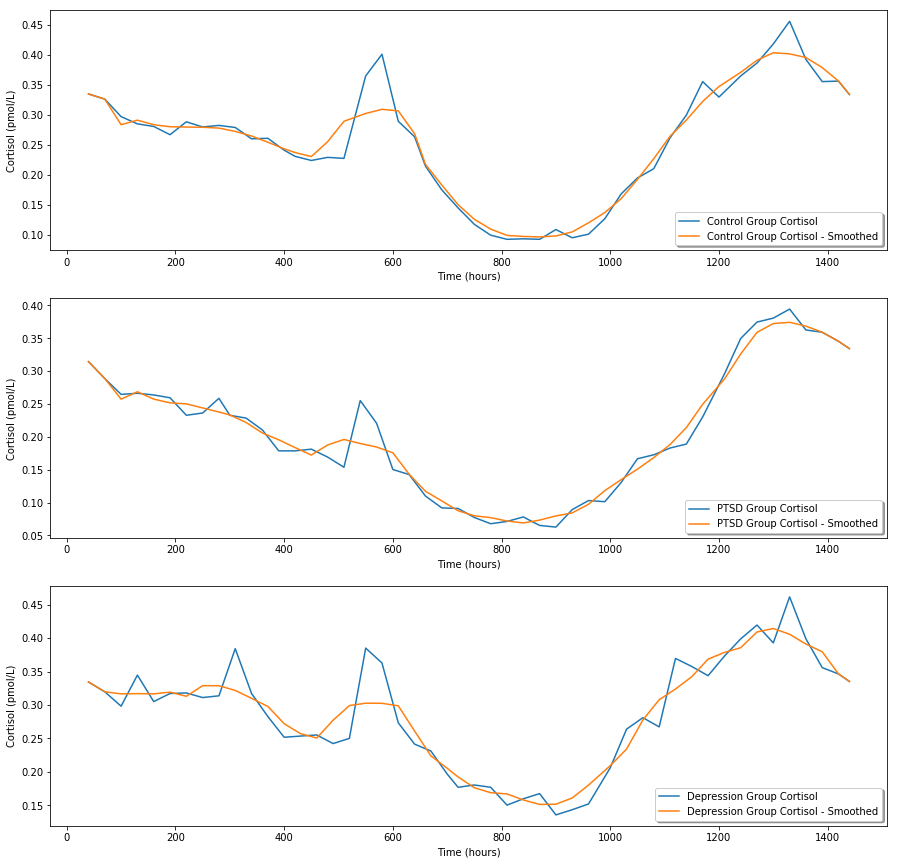

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15,15))

ax1.plot(yehudaControlCortisol[:,0], yehudaControlCortisol[:,1], label = "Control Group Cortisol")
ax1.plot(yehudaControlCortisol_smooth[:,0], yehudaControlCortisol_smooth[:,1], label = "Control Group Cortisol - Smoothed")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (pmol/L)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(yehudaPTSDCortisol[:,0], yehudaPTSDCortisol[:,1], label = "PTSD Group Cortisol")
ax2.plot(yehudaPTSDCortisol_smooth[:,0], yehudaPTSDCortisol_smooth[:,1], label = "PTSD Group Cortisol - Smoothed")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (pmol/L)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(yehudaDepressedCortisol[:,0], yehudaDepressedCortisol[:,1], label = "Depression Group Cortisol")
ax3.plot(yehudaDepressedCortisol_smooth[:,0], yehudaDepressedCortisol_smooth[:,1], label = "Depression Group Cortisol - Smoothed")
ax3.set(xlabel="Time (hours)", ylabel="Cortisol (pmol/L)")
ax3.legend(loc="lower right", shadow = True, fancybox = True)


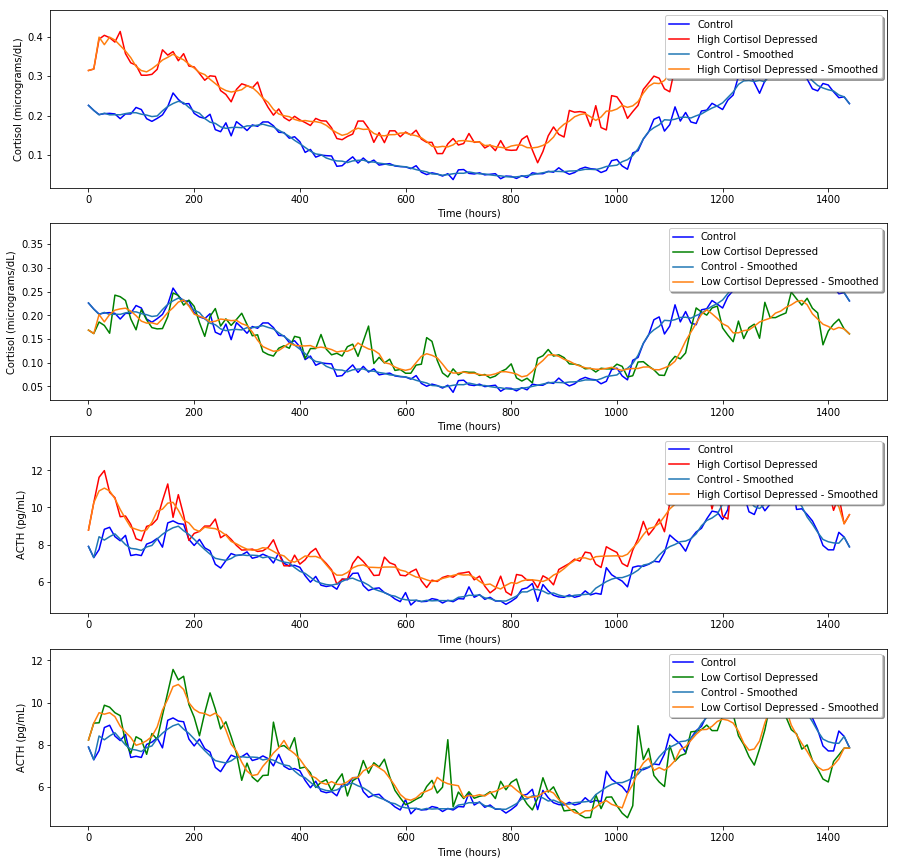

In [17]:
#mpld3.enable_notebook()
%matplotlib inline

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, figsize = (15,15))

ax1.plot(carrollControlCortisol_rearr[:,0], carrollControlCortisol_rearr[:,1], 'b', label = "Control")
ax1.plot(carrollHCDepressedCortisol_rearr[:,0], carrollHCDepressedCortisol_rearr[:,1], 'r', label = "High Cortisol Depressed")
ax1.plot(carrollControlCortisol_rearr_smooth[:,0], carrollControlCortisol_rearr_smooth[:,1], label = "Control - Smoothed")
ax1.plot(carrollHCDepressedCortisol_rearr_smooth[:,0], carrollHCDepressedCortisol_rearr_smooth[:,1], label = "High Cortisol Depressed - Smoothed")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax1.legend(loc="upper right", shadow = True, fancybox = True)

ax2.plot(carrollControlCortisol_rearr[:,0], carrollControlCortisol_rearr[:,1], 'b', label = "Control")
ax2.plot(carrollLCDepressedCortisol_rearr[:,0], carrollLCDepressedCortisol_rearr[:,1], 'g', label = "Low Cortisol Depressed")
ax2.plot(carrollControlCortisol_rearr_smooth[:,0], carrollControlCortisol_rearr_smooth[:,1], label = "Control - Smoothed")
ax2.plot(carrollLCDepressedCortisol_rearr_smooth[:,0], carrollLCDepressedCortisol_rearr_smooth[:,1], label = "Low Cortisol Depressed - Smoothed")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax2.legend(loc="upper right", shadow = True, fancybox = True)

ax3.plot(carrollControlACTH_rearr[:,0], carrollControlACTH_rearr[:,1], 'b', label = "Control")
ax3.plot(carrollHCDepressedACTH_rearr[:,0], carrollHCDepressedACTH_rearr[:,1], 'r', label = "High Cortisol Depressed")
ax3.plot(carrollControlACTH_rearr_smooth[:,0], carrollControlACTH_rearr_smooth[:,1], label = "Control - Smoothed")
ax3.plot(carrollHCDepressedACTH_rearr_smooth[:,0], carrollHCDepressedACTH_rearr_smooth[:,1], label = "High Cortisol Depressed - Smoothed")
ax3.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax3.legend(loc="upper right", shadow = True, fancybox = True)

ax4.plot(carrollControlACTH_rearr[:,0], carrollControlACTH_rearr[:,1], 'b', label = "Control")
ax4.plot(carrollLCDepressedACTH_rearr[:,0], carrollLCDepressedACTH_rearr[:,1], 'g', label = "Low Cortisol Depressed")
ax4.plot(carrollControlACTH_rearr_smooth[:,0], carrollControlACTH_rearr_smooth[:,1], label = "Control - Smoothed")
ax4.plot(carrollLCDepressedACTH_rearr_smooth[:,0], carrollLCDepressedACTH_rearr_smooth[:,1], label = "Low Cortisol Depressed - Smoothed")
ax4.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax4.legend(loc="upper right", shadow = True, fancybox = True)

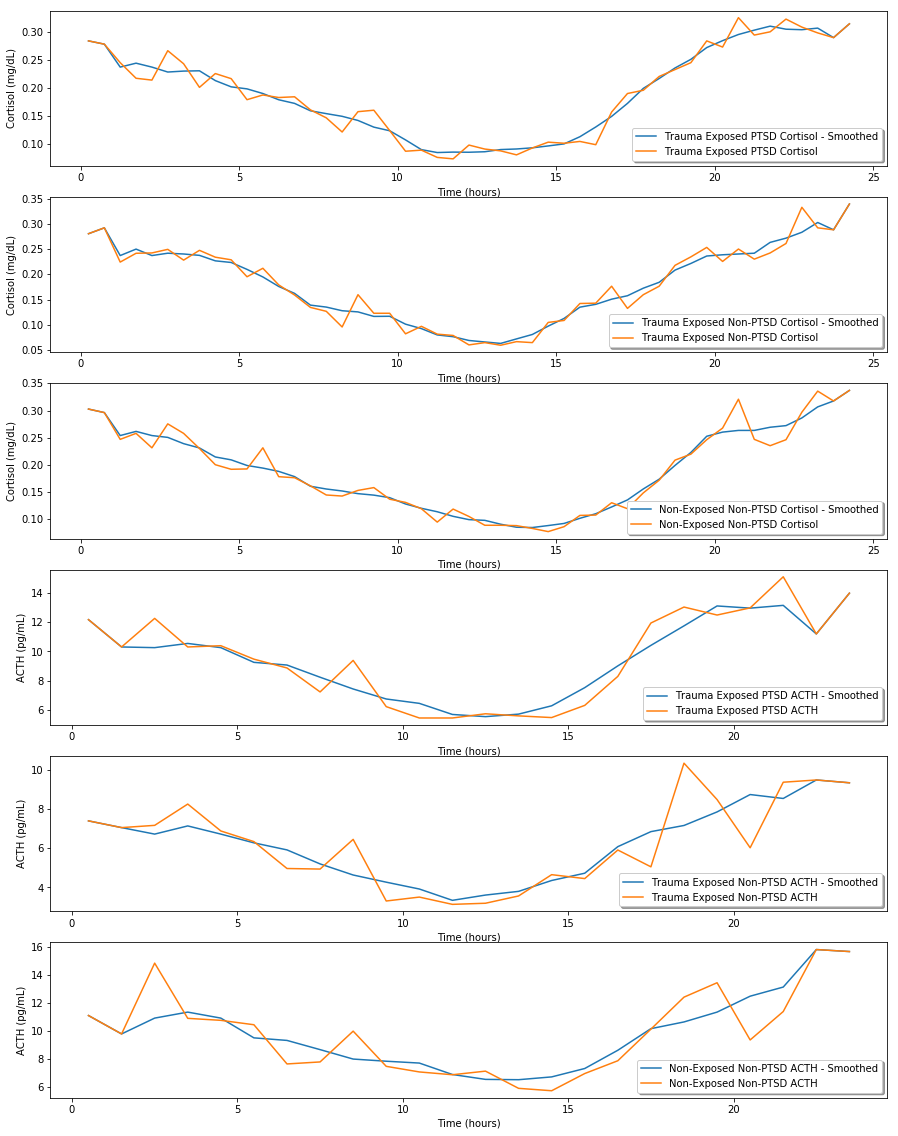

In [18]:
%matplotlib inline

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (15,20))

ax1.plot(golierPTSDCortisol_rearr_smooth[:,0], golierPTSDCortisol_rearr_smooth[:,1], label = "Trauma Exposed PTSD Cortisol - Smoothed")
ax1.plot(golierPTSDCortisol_rearr[:,0], golierPTSDCortisol_rearr[:,1], label = "Trauma Exposed PTSD Cortisol")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (mg/dL)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(golierNonPTSDTraumaExposedCortisol_rearr_smooth[:,0], golierNonPTSDTraumaExposedCortisol_rearr_smooth[:,1], label = "Trauma Exposed Non-PTSD Cortisol - Smoothed")
ax2.plot(golierNonPTSDTraumaExposedCortisol_rearr[:,0], golierNonPTSDTraumaExposedCortisol_rearr[:,1], label = "Trauma Exposed Non-PTSD Cortisol")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (mg/dL)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(golierNonPTSDNonExposedCortisol_rearr_smooth[:,0], golierNonPTSDNonExposedCortisol_rearr_smooth[:,1], label = "Non-Exposed Non-PTSD Cortisol - Smoothed")
ax3.plot(golierNonPTSDNonExposedCortisol_rearr[:,0], golierNonPTSDNonExposedCortisol_rearr[:,1], label = "Non-Exposed Non-PTSD Cortisol")
ax3.set(xlabel="Time (hours)", ylabel="Cortisol (mg/dL)")
ax3.legend(loc="lower right", shadow = True, fancybox = True)

ax4.plot(golierPTSDACTH_rearr_smooth[:,0], golierPTSDACTH_rearr_smooth[:,1], label = "Trauma Exposed PTSD ACTH - Smoothed")
ax4.plot(golierPTSDACTH_rearr[:,0], golierPTSDACTH_rearr[:,1], label = "Trauma Exposed PTSD ACTH")
ax4.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax4.legend(loc="lower right", shadow = True, fancybox = True)

ax5.plot(golierNonPTSDTraumaExposedACTH_rearr_smooth[:,0], golierNonPTSDTraumaExposedACTH_rearr_smooth[:,1], label = "Trauma Exposed Non-PTSD ACTH - Smoothed")
ax5.plot(golierNonPTSDTraumaExposedACTH_rearr[:,0], golierNonPTSDTraumaExposedACTH_rearr[:,1], label = "Trauma Exposed Non-PTSD ACTH")
ax5.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax5.legend(loc="lower right", shadow = True, fancybox = True)

ax6.plot(golierNonPTSDNonExposedACTH_rearr_smooth[:,0], golierNonPTSDNonExposedACTH_rearr_smooth[:,1], label = "Non-Exposed Non-PTSD ACTH - Smoothed")
ax6.plot(golierNonPTSDNonExposedACTH_rearr[:,0], golierNonPTSDNonExposedACTH_rearr[:,1], label = "Non-Exposed Non-PTSD ACTH")
ax6.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax6.legend(loc="lower right", shadow = True, fancybox = True)


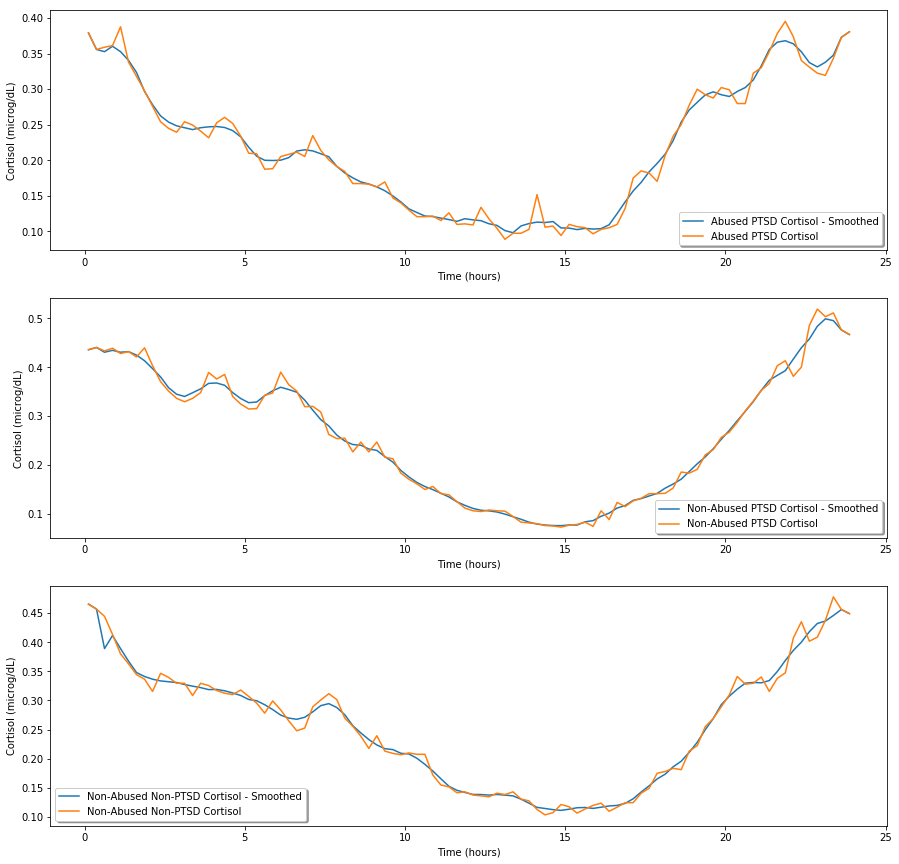

In [19]:
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15,15))

ax1.plot(bremnerAbusedPTSDCortisol_rearr_smooth[:,0], bremnerAbusedPTSDCortisol_rearr_smooth[:,1], label = "Abused PTSD Cortisol - Smoothed")
ax1.plot(bremnerAbusedPTSDCortisol_rearr[:,0], bremnerAbusedPTSDCortisol_rearr[:,1], label = "Abused PTSD Cortisol")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (microg/dL)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(bremnerNonAbusedPTSDCortisol_rearr_smooth[:,0], bremnerNonAbusedPTSDCortisol_rearr_smooth[:,1], label = "Non-Abused PTSD Cortisol - Smoothed")
ax2.plot(bremnerNonAbusedPTSDCortisol_rearr[:,0], bremnerNonAbusedPTSDCortisol_rearr[:,1], label = "Non-Abused PTSD Cortisol")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (microg/dL)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(bremnerNonAbusedNonPTSDCortisol_rearr_smooth[:,0], bremnerNonAbusedNonPTSDCortisol_rearr_smooth[:,1], label = "Non-Abused Non-PTSD Cortisol - Smoothed")
ax3.plot(bremnerNonAbusedNonPTSDCortisol_rearr[:,0], bremnerNonAbusedNonPTSDCortisol_rearr[:,1], label = "Non-Abused Non-PTSD Cortisol")
ax3.set(xlabel="Time (hours)", ylabel="Cortisol (microg/dL)")
ax3.legend(loc="lower left", shadow = True, fancybox = True)


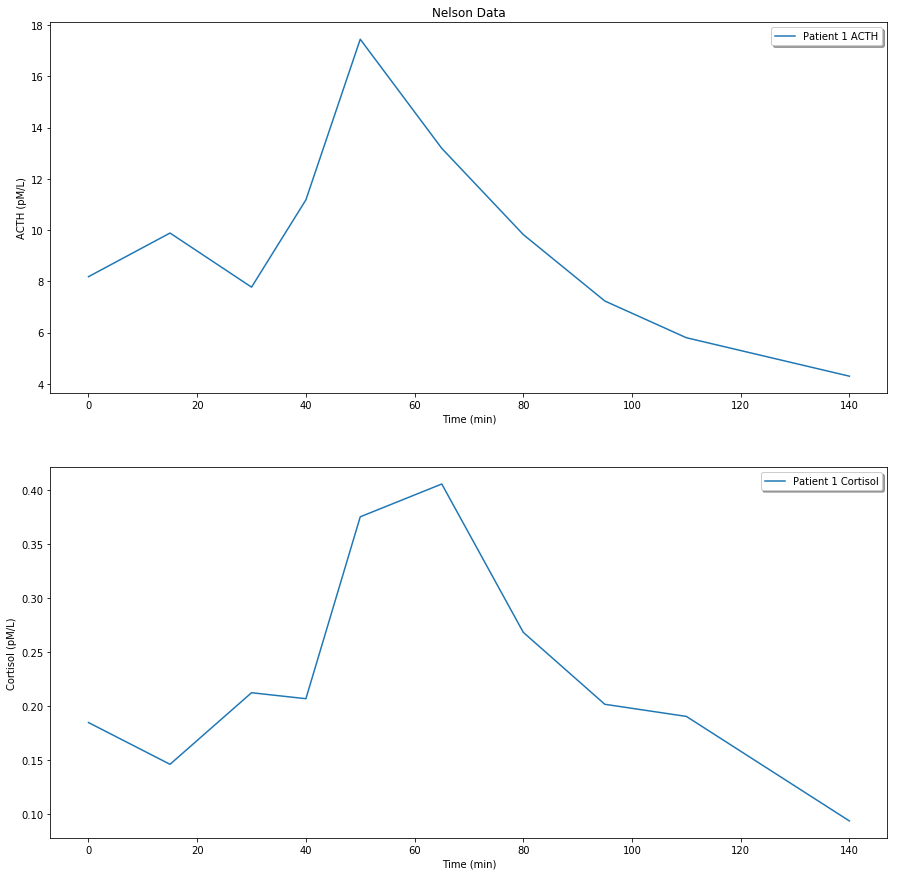

In [21]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (15, 15))

ax1.plot(nelsonACTH[:,0], nelsonACTH[:,3], label = "Patient 1 ACTH")
ax1.set(ylabel = "ACTH (pM/L)", xlabel = "Time (min)", title = "Nelson Data")
ax1.legend(loc="upper right", shadow = True, fancybox = True)

ax2.plot(nelsonCortisol[:,0], nelsonCortisol[:,3], label = "Patient 1 Cortisol")
ax2.set(ylabel = "Cortisol (pM/L)", xlabel = "Time (min)")
ax2.legend(loc="upper right", shadow = True, fancybox = True)

## Model Function--Includes ODE Solver <a name="modelfunction"></a>

In [2]:
def model(params, ics):
    def ode_system(t, y):
        dy = np.zeros(3) # 3 equation system, R = CRH, A = ACTH, C = CORT
        
        [b1, b2, b3, g1, g2, V, K, m, a1, a2] = params
        
        # differential equation definitions
        dy[0] = (a1*V)/(K + (ODEsolver.delayedCORT**m)) - b1*y[0]
        dy[1] = (a2*V)/(K + (ODEsolver.delayedCORT**m)) + g1*ODEsolver.delayedCRH - b2*y[1]
        dy[2] = g2*ODEsolver.delayedACTH - b3*y[2]
        
        return dy
    
    # Call the solve() function from my ODEsolver module, and pass all of the information it needs.
    # Arguments are as follows: ODE function to solve, array of initial conditions, start time, step size, end time
    # The last three arguments are optional (leave blank for ODE systems) for delay differential equation systems, 
    #  tau0 is the delay in CRH, tau1 is the delay in ACTH, tau2 is the delay in CORT, 
    #  and delay is an array of booleans to set whether we use delays in [CRH, ACTH, CORT]
    timeSeries = ODEsolver.solve(ode_system, ics, t_start, t_step, t_end, tau0 = 10, tau1 = 30, tau2 = 60, delay = [True, True, True], delay_rough = True)
    return timeSeries

## Cost Function Definition <a name="cost"></a>

In [1]:
def cost_fun(params):
    simData = model(params, y0)
    
    return costFun.SSE_cost(nelsonACTH[:,0], nelsonACTH[:,1], nelsonCortisol[:,0], nelsonCortisol[:,1], simData)

## Run the Optimization <a name="run"></a>

In [52]:
# initial conditions
# order: CRH, ACTH, CORT

# based on: golierPTSD
y0 = [1, nelsonACTH[0,1], nelsonCortisol[0,1]]

In [53]:
# number of times to run the optimization
n = 1

# define an array to hold the population of parameter vectors
opt_pars = np.zeros((n, len(bounds)+1))

# initialize arrays to save simulation cortisol and ACTH data from each optimization
sims_cort = np.zeros((5602, n))
sims_acth = np.zeros((5602, n))
sims_crh = np.zeros((5602, n))

In [ ]:
%%time

# loop n times, running the optimization each time
for i in range(0,n):
    
    print(f"Optimization Run #{i+1}")
    
    # call the differential evolution optimization function on the cost function
    res = sco.differential_evolution(cost_fun, bounds, maxiter = 9, disp = True, popsize = 1)
    
    # alternatively, we can run the SHGO algorithm with the sampling_method = "sobol" flag to do global
    #     optimization with reporting all local minima, as well
    #res = sco.shgo(cost_fun, bounds, callback=callback_fun(*shgo_iter_steps), options = {"f_min": 0.1, "maxiter": None, "minimize_every_iter": True, "local_iter": False, "disp": True}, iters = 3)
    #res = sco.basinhopping(cost_fun, x0, niter = 1000)
    #res = sco.dual_annealing(cost_fun, bounds)
    
    # plug the optimized parameters into the solver
    print("Running model with optimized params")
    optimizedSimData = model(res.x, y0)
    # save CRH, cortisol and ACTH       
    # data into sims arrays
    sims_cort[:,i] = optimizedSimData[:,3]
    sims_acth[:,i] = optimizedSimData[:,2]
    sims_crh[:,i] = optimizedSimData[:,1]
    
    # save the cost function values and optimized parameters for each iteration into the array opt_pars
    opt_pars[i,0] = res.fun
    opt_pars[i,1:] = res.x

Optimization Run #1
differential_evolution step 1: f(x)= 49.7101
differential_evolution step 2: f(x)= 49.7101
differential_evolution step 3: f(x)= 46.2406
differential_evolution step 4: f(x)= 45.463
differential_evolution step 5: f(x)= 45.463
differential_evolution step 6: f(x)= 43.4862
differential_evolution step 7: f(x)= 43.4862
differential_evolution step 8: f(x)= 42.4021
differential_evolution step 9: f(x)= 42.4021


## Save Output to File <a name="saveoutput"></a>

In [ ]:
df_t = pd.DataFrame(optimizedSimData[:,0])
df_cort = pd.DataFrame(sims_cort)
df_acth = pd.DataFrame(sims_acth)
df_crh = pd.DataFrame(sims_crh)

df_t.to_excel(excel_writer = 'bairagiModel_output/bairagiModel-nelson-patientMean-timeSteps-1-iteration-normalizedCost.xlsx')
df_cort.to_excel(excel_writer = 'bairagiModel_output/bairagiModel-nelson-patientMean-sims-cort-1-iteration-normalizedCost.xlsx')
df_acth.to_excel(excel_writer = 'bairagiModel_output/bairagiModel-nelson-patientMean-sims-acth-1-iteration-normalizedCost.xlsx')
df_crh.to_excel(excel_writer = 'bairagiModel_output/bairagiModel-nelson-patientMean-sims-crh-1-iteration-normalizedCost.xlsx')

In [55]:
np.savetxt('bairagiModel_output/bairagiModel-nelson-patient50-opt-pars-1-iteration.txt', opt_pars)

In [56]:
np.savetxt('bairagiModel_output/bairagiModel-nelson-patient50-sims-crh-1-iteration.txt', sims_crh)
np.savetxt('bairagiModel_output/bairagiModel-nelson-patient50-sims-acth-1-iteration.txt', sims_acth)
np.savetxt('bairagiModel_output/bairagiModel-nelson-patient50-sims-cort-1-iteration.txt', sims_cort)

In [57]:
np.savetxt('bairagiModel_output/bairagiModel-nelson-patient50-initial-conditions-1-iteration.txt', y0)
np.savetxt('bairagiModel_output/bairagiModel-nelson-patient50-bounds-1-iteration.txt', bounds)

## Compute Means and Std Devations of Parameters and Output as Table <a name="paramtable"></a>

In [58]:
# compute parameter means and standard deviations
b1_mean = np.mean(opt_pars[:,1])
b1_std = np.std(opt_pars[:,1])
b2_mean = np.mean(opt_pars[:,1])
b2_std = np.std(opt_pars[:,1])
b3_mean = np.mean(opt_pars[:,1])
b3_std = np.std(opt_pars[:,1])
g1_mean = np.mean(opt_pars[:,1])
g1_std = np.std(opt_pars[:,1])
g2_mean = np.mean(opt_pars[:,1])
g2_std = np.std(opt_pars[:,1])
V_mean = np.mean(opt_pars[:,1])
V_std = np.std(opt_pars[:,1])
K_mean = np.mean(opt_pars[:,1])
K_std = np.std(opt_pars[:,1])
m_mean = np.mean(opt_pars[:,1])
m_std = np.std(opt_pars[:,1])
a1_mean = np.mean(opt_pars[:,1])
a1_std = np.std(opt_pars[:,1])
a2_mean = np.mean(opt_pars[:,1])
a2_std = np.std(opt_pars[:,1])

In [59]:
# print a table of parameter means and standard deviations
print(tabulate([["b1", "%f +- %f" % (b1_mean, b1_std)], ["b2", "%f +- %f" % (b2_mean, b2_std)], ["b3", "%f +- %f" % (b3_mean, b3_std)], ["g1", "%f +- %f" % (g1_mean, g1_std)], ["g2", "%f +- %f" % (g2_mean, g2_std)], ["V", "%f +- %f" % (V_mean, V_std)], ["K", "%f +- %f" % (K_mean, K_std)], ["m", "%f +- %f" % (m_mean, m_std)], ["a1", "%f +- %f" % (a1_mean, a1_std)], ["a2", "%f +- %f" % (a2_mean, a2_std)]], headers = ["Parameter", "Mean +- Standard Deviation"]))

Parameter    Mean +- Standard Deviation
-----------  ----------------------------
b1           0.021767 +- 0.000000
b2           0.021767 +- 0.000000
b3           0.021767 +- 0.000000
g1           0.021767 +- 0.000000
g2           0.021767 +- 0.000000
V            0.021767 +- 0.000000
K            0.021767 +- 0.000000
m            0.021767 +- 0.000000
a1           0.021767 +- 0.000000
a2           0.021767 +- 0.000000


In [60]:
# save parameter means and std devs to a file
np.savetxt('bairagiModel_output/bairagiModel-nelson-patient50-param-means-stds-5-iterations.txt', [b1_mean, b1_std, b2_mean, b2_std, b3_mean, b3_std, g1_mean, g1_std, g2_mean, g2_std, V_mean, V_std, K_mean, K_std, m_mean, m_std, a1_mean, a1_std, a2_mean, a2_std])

## Plots <a name="plots"></a>

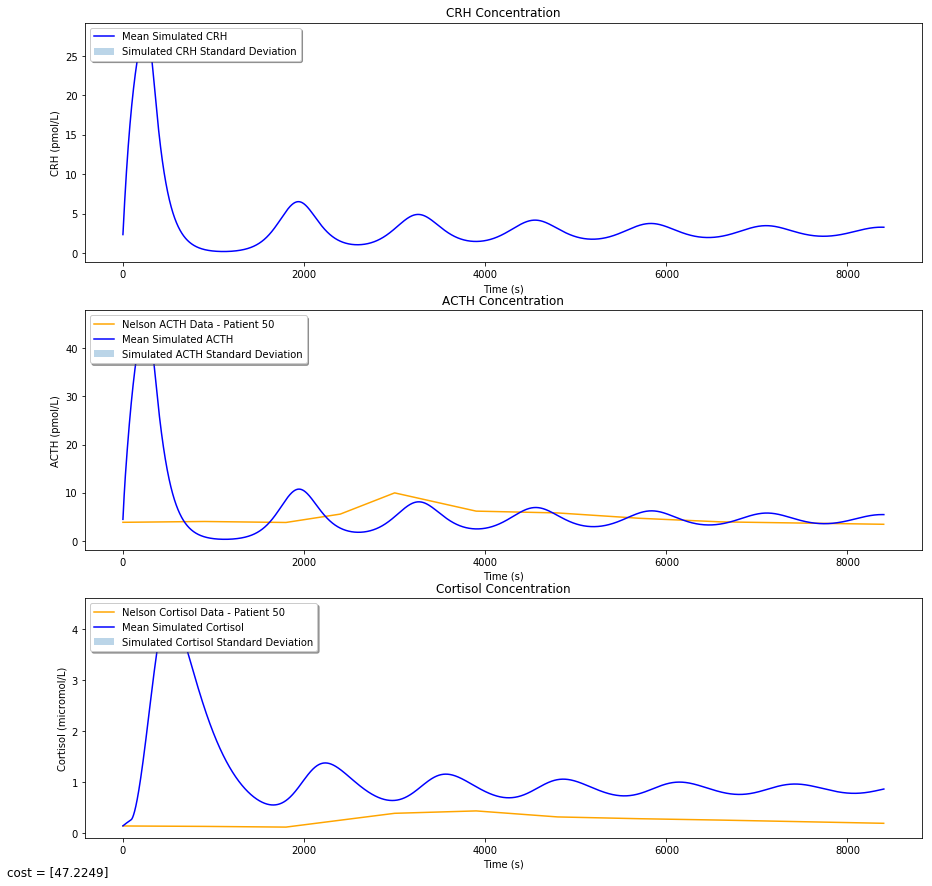

In [61]:
%matplotlib inline

# plot with 3 subfigures--one for CRH, one for ACTH and one for cortisol
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15, 15))

# if running more than one iteration of optimization, uncomment plot command with np.mean and fill_between
# and comment plot command without np.mean
#
# if only one run is stored in sims variables, comment out plot commands with np.mean and fill_between
#ax1.plot(optimizedSimData[:,0], sims_crh, label = "Simulated CRH Data", color = "blue")
ax1.plot(optimizedSimData[:,0]*3, np.mean(sims_crh, axis = 1), label = "Mean Simulated CRH", color = "blue")
ax1.fill_between(optimizedSimData[:,0]*3, np.mean(sims_crh, axis = 1) - np.std(sims_crh, axis = 1), np.mean(sims_crh, axis = 1) + np.std(sims_crh, axis = 1), alpha = 0.3, label = "Simulated CRH Standard Deviation")
ax1.legend(loc = "upper left", shadow = True, fancybox = True)
ax1.set(xlabel = "Time (s)", ylabel = "CRH (pmol/L)", title = "CRH Concentration")

# change this line when you change which data set you are matching
ax2.plot(nelsonACTH[:,0]*3, nelsonACTH[:,1], label = "Nelson ACTH Data - Patient Mean", color = "orange")

# for only 1 iteration, uncomment below and comment the following line
#ax2.plot(optimizedSimData[:,0], sims_acth, label = "Simulated ACTH Data", color = "blue")
ax2.plot(optimizedSimData[:,0]*3, np.mean(sims_acth, axis = 1), label = "Mean Simulated ACTH", color = "blue")
ax2.fill_between(optimizedSimData[:,0]*3, np.mean(sims_acth, axis = 1) - np.std(sims_acth, axis = 1), np.mean(sims_acth, axis = 1) + np.std(sims_acth, axis = 1), alpha = 0.3, label = "Simulated ACTH Standard Deviation")
ax2.legend(loc = "upper left", shadow = True, fancybox = True)
ax2.set(xlabel = "Time (s)", ylabel = "ACTH (pmol/L)", title = "ACTH Concentration")

# change this line when you change which data set you are matching
ax3.plot(nelsonCortisol[:,0]*3, nelsonCortisol[:,1], label = "Nelson Cortisol Data - Patient Mean", color = "orange")

# for only 1 iteration, uncomment below and comment the following line
#ax3.plot(optimizedSimData[:,0], sims_cort, label = "Simulated Cortisol Data", color = "blue")
ax3.plot(optimizedSimData[:,0]*3, np.mean(sims_cort, axis = 1), label = "Mean Simulated Cortisol", color = "blue")
ax3.fill_between(optimizedSimData[:,0]*3, np.mean(sims_cort, axis = 1) - np.std(sims_cort, axis = 1), np.mean(sims_cort, axis = 1) + np.std(sims_cort, axis = 1), alpha = 0.3, label = "Simulated Cortisol Standard Deviation")
ax3.legend(loc = "upper left", shadow = True, fancybox = True)
ax3.set(xlabel = "Time (s)", ylabel = "Cortisol (micromol/L)", title = "Cortisol Concentration")

# include the value of the cost function for this set of graphs at the bottom of the figure
txt = "cost = []"
plt.figtext(0.1, 0.09, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)
plt.savefig("bairagiModel_output/bairagiModel-nelson-patientMean-1-iteration.png", dpi = 300)


## Reproduce Figure 2 from Paper <a name="no-opt"></a>

In [92]:
# shorten the time of iteration to see how this delay works
t_start = -0.5
t_end = 11520.5
t_step = 0.5

# set the initial conditions
y0 = [2.4, 4, 0.7]

In [93]:
%%time

# run the solver with authors' published parameters
optimizedSimData = model(authors_params, y0)
    
# save CRH, cortisol and ACTH data into sims arrays
sims_cort = optimizedSimData[:,3]
sims_acth = optimizedSimData[:,2]
sims_crh = optimizedSimData[:,1]

CPU times: user 4h 53min 49s, sys: 43.7 s, total: 4h 54min 32s
Wall time: 7h 12min 17s


In [97]:
sims_crh_1440 = sims_crh[-4320:]
sims_acth_1440 = sims_acth[-4320:]
sims_cort_1440 = sims_cort[-4320:]

In [89]:
print(len(sims_acth))

11522


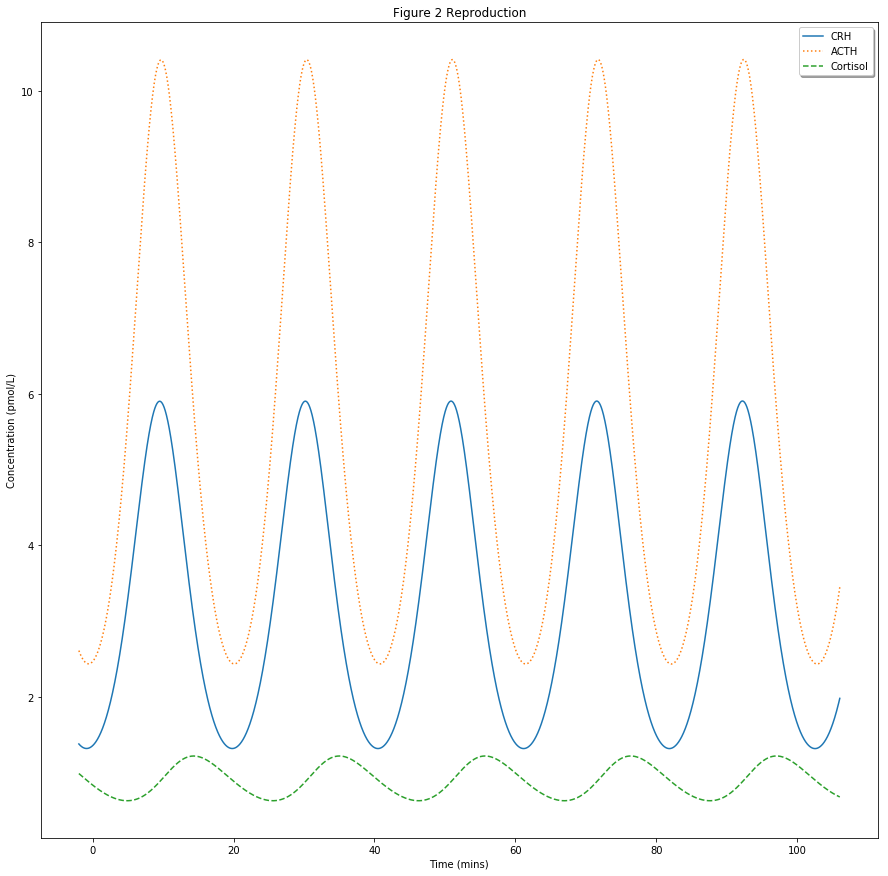

In [103]:
%matplotlib inline
fig, (ax1) = plt.subplots(nrows = 1, figsize = (15,15))

ax1.plot(optimizedSimData[-4320:,0]/20-470, sims_crh_1440, '-', label = "CRH", )
ax1.plot(optimizedSimData[-4320:,0]/20-470, sims_acth_1440, ':', label = "ACTH")
ax1.plot(optimizedSimData[-4320:,0]/20-470, sims_cort_1440, '--', label = "Cortisol")
ax1.set(ylabel = "Concentration (pmol/L)", xlabel = "Time (mins)", title = "Figure 2 Reproduction")
ax1.legend(loc = "upper right", shadow = True, fancybox = True)

plt.savefig("bairagiModel_output/bairagiModel-figure2-reproduction.png", dpi=300)

## Dependencies <a name="dependencies"></a>

In [1]:
%load_ext watermark

In [2]:
%watermark --iversions